In [1]:
import pandas as pd
import sys
import os
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 将当前工作目录添加到 Python 路径
# 获取当前工作目录
current_working_dir = os.getcwd()

# 将根目录添加到 sys.path
sys.path.append(os.path.abspath(os.path.join(current_working_dir, '../..')))

In [2]:
# 读取数据
df = pd.read_csv('../../data/dataset.csv')

# 对指定列进行独热编码
columns_to_encode = ['CM_type', 'CM_morph', 'MS2_morph', 'CP_morph', 'Cation', 'Anion']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# 分割数据集
X = df_encoded.drop(['Cs'], axis=1)
y = df_encoded['Cs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6
)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


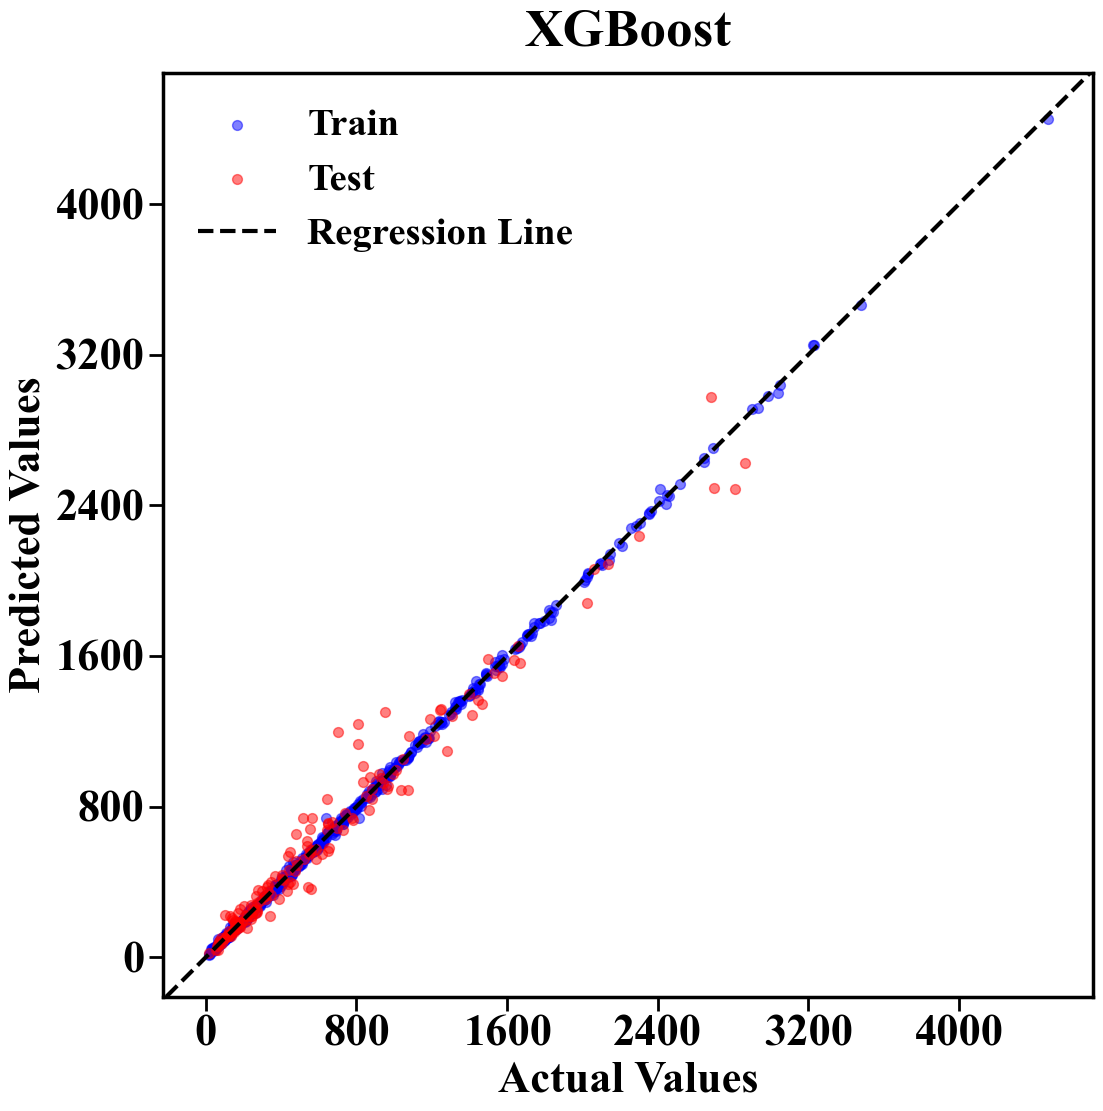

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.999609,9.065652,3.069248,13.016073,0.969905,62.05875,13.054699,102.127974


In [3]:
# 模型训练
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.6,
    gamma=0.3,
    # max_depth=18,
    # min_child_weight=9,
    # reg_alpha=0.5,
    # colsample_bytree=0.8,
    # colsample_bylevel=0.6,
    # colsample_bynode=0.6,
)
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from function import metrics_to_dataframe, plot_actual_vs_predicted
xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost', figpath='xgb_actual_vs_predicted.png')
xgb_metrics